In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(-27.580463663584773, -15.435383025848012),
 (-21.401294620803426, -62.15129749209984),
 (-43.01020539750208, 131.62689674128973),
 (4.645281877021603, 72.22545644082578),
 (-76.28608668230908, 108.67955701799326),
 (-26.12203287584967, -139.07319874423024),
 (-52.360708619924075, -62.70900628067517),
 (70.96686004201678, 40.29421908746079),
 (48.54482331361177, 77.95826067927607),
 (52.82309463042654, -131.8143049371725),
 (-60.72776597779253, 35.39912673574378),
 (67.51520453792568, 167.8788529834585),
 (-83.79688387968831, -52.20736734622993),
 (-33.68525498421036, -15.89739580728974),
 (-41.136385317966116, -8.109755005975273),
 (59.8837650841937, -48.317665660555036),
 (89.2109244785168, -5.438698523396511),
 (-42.86178374249918, 54.00878177108518),
 (5.290559869538228, 51.455098886143105),
 (12.74247703884717, 120.88103493454946),
 (-36.55736415227566, -99.49114232666572),
 (-75.18422864986134, 115.3342490035514),
 (3.660729483376315, -47.098039098397265),
 (-74.61893038715442, 

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

573

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a10ec51f53fab2eb780ceb0558541a08


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | doctor pedro p. pena
City not found. Skipping...
Processing Record 3 of Set 1 | port lincoln
Processing Record 4 of Set 1 | eydhafushi
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | ostrovnoy
Processing Record 9 of Set 1 | ayagoz
Processing Record 10 of Set 1 | prince rupert
Processing Record 11 of Set 1 | port alfred
Processing Record 12 of Set 1 | bilibino
Processing Record 13 of Set 1 | qaqortoq
Processing Record 14 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 15 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 16 of Set 1 | hobyo
Processing Record 17 of Set 1 | ligaya
Processing Record 18 of Set 1 | lebu
Processing Record 19 of Set 1 | amapa
Processing Record 20 of Set 1 | butaritari
Processing Record 21 of Set 1

Processing Record 38 of Set 4 | ucluelet
Processing Record 39 of Set 4 | sung noen
Processing Record 40 of Set 4 | saint-pierre
Processing Record 41 of Set 4 | araouane
Processing Record 42 of Set 4 | mandalgovi
Processing Record 43 of Set 4 | alushta
Processing Record 44 of Set 4 | chifeng
Processing Record 45 of Set 4 | jalu
Processing Record 46 of Set 4 | rungata
City not found. Skipping...
Processing Record 47 of Set 4 | port hedland
Processing Record 48 of Set 4 | sao joao da barra
Processing Record 49 of Set 4 | hualmay
Processing Record 50 of Set 4 | adrar
Processing Record 1 of Set 5 | anchorage
Processing Record 2 of Set 5 | porto belo
Processing Record 3 of Set 5 | xichang
Processing Record 4 of Set 5 | san juan
Processing Record 5 of Set 5 | barstow
Processing Record 6 of Set 5 | tungkang
City not found. Skipping...
Processing Record 7 of Set 5 | new norfolk
Processing Record 8 of Set 5 | tarko-sale
Processing Record 9 of Set 5 | carlentini
Processing Record 10 of Set 5 | sa

Processing Record 29 of Set 8 | preobrazheniye
Processing Record 30 of Set 8 | anaco
Processing Record 31 of Set 8 | kambove
Processing Record 32 of Set 8 | nagato
Processing Record 33 of Set 8 | basco
Processing Record 34 of Set 8 | hofn
Processing Record 35 of Set 8 | coos bay
Processing Record 36 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 37 of Set 8 | haizhou
Processing Record 38 of Set 8 | assiniboia
Processing Record 39 of Set 8 | maumere
Processing Record 40 of Set 8 | soyo
Processing Record 41 of Set 8 | lorengau
Processing Record 42 of Set 8 | hambantota
Processing Record 43 of Set 8 | mayo
Processing Record 44 of Set 8 | bridgeport
Processing Record 45 of Set 8 | mira
Processing Record 46 of Set 8 | khatanga
Processing Record 47 of Set 8 | ust-kamchatsk
City not found. Skipping...
Processing Record 48 of Set 8 | lolua
City not found. Skipping...
Processing Record 49 of Set 8 | arman
Processing Record 50 of Set 8 | havoysund
Processing Record 1 of Se

Processing Record 14 of Set 12 | dalbandin
Processing Record 15 of Set 12 | dzhusaly
City not found. Skipping...
Processing Record 16 of Set 12 | bud
Processing Record 17 of Set 12 | ust-maya
Processing Record 18 of Set 12 | ayr
Processing Record 19 of Set 12 | trairi
Processing Record 20 of Set 12 | guanambi
Processing Record 21 of Set 12 | iranshahr
Processing Record 22 of Set 12 | sorong
Processing Record 23 of Set 12 | hassleholm
-----------------------------
Data Retrieval Complete      
-----------------------------


In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jamestown,42.0970,-79.2353,81.99,83,1,6.91,US,2021-08-09 14:25:26
1,Port Lincoln,-34.7333,135.8667,61.03,44,6,19.71,AU,2021-08-09 14:26:26
2,Eydhafushi,5.1033,73.0708,83.05,73,97,13.96,MV,2021-08-09 14:26:27
3,Albany,42.6001,-73.9662,81.14,67,79,5.93,US,2021-08-09 14:26:27
4,Rikitea,-23.1203,-134.9692,73.54,81,26,11.10,PF,2021-08-09 14:26:27
5,Ushuaia,-54.8000,-68.3000,42.46,75,75,4.61,AR,2021-08-09 14:25:04
6,Ostrovnoy,68.0531,39.5131,61.25,58,0,13.27,RU,2021-08-09 14:26:28
7,Ayagoz,47.9714,80.4392,69.80,52,9,16.91,KZ,2021-08-09 14:26:28
8,Prince Rupert,54.3161,-130.3201,56.89,95,90,10.36,CA,2021-08-09 14:26:29
9,Port Alfred,-33.5906,26.8910,60.22,59,23,29.55,ZA,2021-08-09 14:26:29


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
new_city_data_df = city_data_df[new_column_order]
new_city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jamestown,US,2021-08-09 14:25:26,42.0970,-79.2353,81.99,83,1,6.91
1,Port Lincoln,AU,2021-08-09 14:26:26,-34.7333,135.8667,61.03,44,6,19.71
2,Eydhafushi,MV,2021-08-09 14:26:27,5.1033,73.0708,83.05,73,97,13.96
3,Albany,US,2021-08-09 14:26:27,42.6001,-73.9662,81.14,67,79,5.93
4,Rikitea,PF,2021-08-09 14:26:27,-23.1203,-134.9692,73.54,81,26,11.10
5,Ushuaia,AR,2021-08-09 14:25:04,-54.8000,-68.3000,42.46,75,75,4.61
6,Ostrovnoy,RU,2021-08-09 14:26:28,68.0531,39.5131,61.25,58,0,13.27
7,Ayagoz,KZ,2021-08-09 14:26:28,47.9714,80.4392,69.80,52,9,16.91
8,Prince Rupert,CA,2021-08-09 14:26:29,54.3161,-130.3201,56.89,95,90,10.36
9,Port Alfred,ZA,2021-08-09 14:26:29,-33.5906,26.8910,60.22,59,23,29.55


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

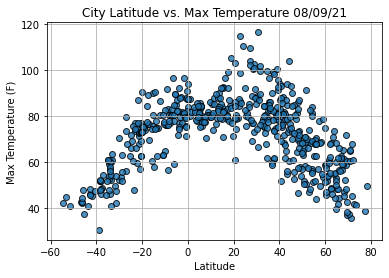

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

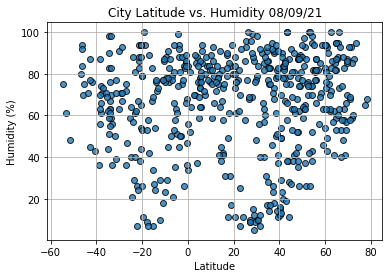

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

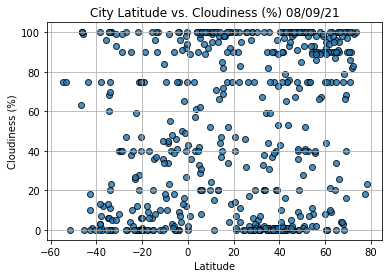

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

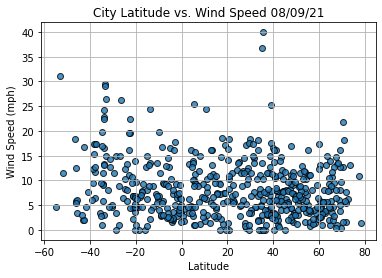

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
index13 = city_data_df.loc[13]
index13

City                       Ligaya
Lat                       12.6599
Lng                      120.8923
Max Temp                     79.2
Humidity                       84
Cloudiness                    100
Wind Speed                   5.46
Country                        PH
Date          2021-08-09 14:26:31
Name: 13, dtype: object

In [20]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3       True
4      False
       ...  
521    False
522    False
523     True
524    False
525     True
Name: Lat, Length: 526, dtype: bool

In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jamestown,42.0970,-79.2353,81.99,83,1,6.91,US,2021-08-09 14:25:26
2,Eydhafushi,5.1033,73.0708,83.05,73,97,13.96,MV,2021-08-09 14:26:27
3,Albany,42.6001,-73.9662,81.14,67,79,5.93,US,2021-08-09 14:26:27
6,Ostrovnoy,68.0531,39.5131,61.25,58,0,13.27,RU,2021-08-09 14:26:28
7,Ayagoz,47.9714,80.4392,69.80,52,9,16.91,KZ,2021-08-09 14:26:28


In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

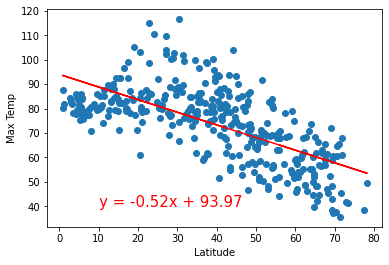

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

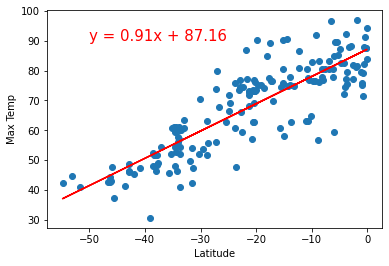

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

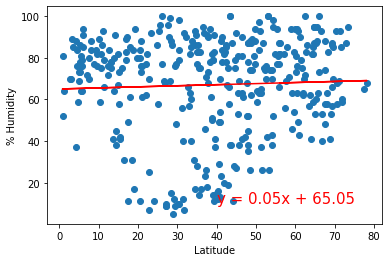

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

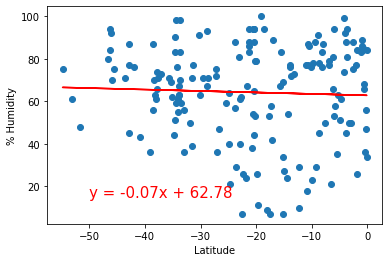

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

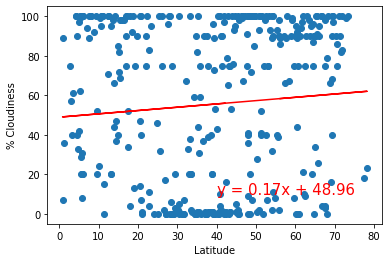

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

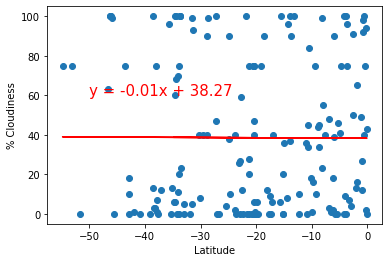

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

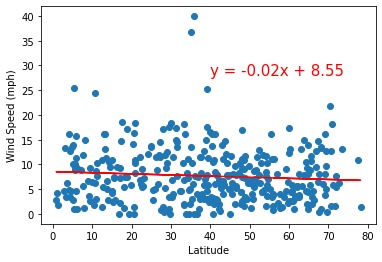

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed (mph)',(40,28))

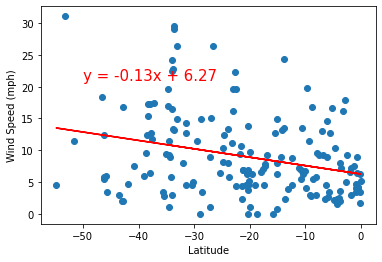

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed (mph)',(-50,21))